# EDA 

In [1]:
import pandas as pd

In [12]:
data_dir = "./data/"
train_ds = pd.read_csv(data_dir + "train.csv", index_col="id")
test_ds = pd.read_csv(data_dir + "test.csv", index_col="id")

In [13]:
train_ds

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D


## Null values

In [19]:
train_ds.isna().any()

N_Days           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
Status           False
dtype: bool

## Categorical features

### Drug

Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64


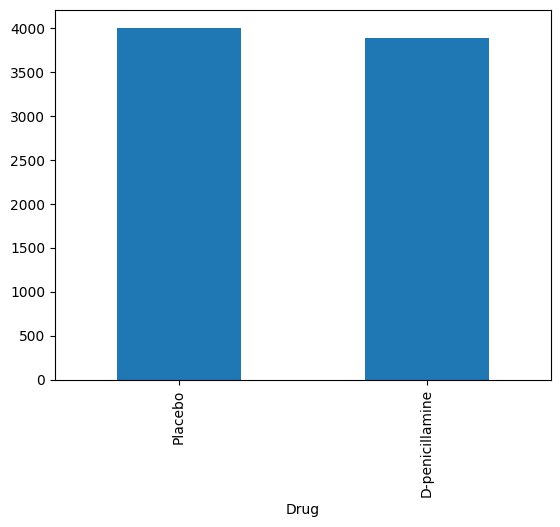

In [39]:
print(train_ds["Drug"].value_counts())
train_ds["Drug"].value_counts().plot(kind="bar");

### Sex

- Lots more females than males.


Sex
F    7336
M     569
Name: count, dtype: int64


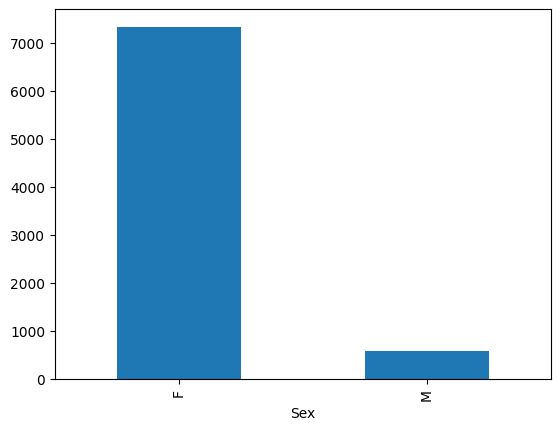

In [40]:
print(train_ds["Sex"].value_counts())
train_ds["Sex"].value_counts().plot(kind="bar");

### Ascites

- Lots more negatives than positives.

Ascites
N    7525
Y     380
Name: count, dtype: int64


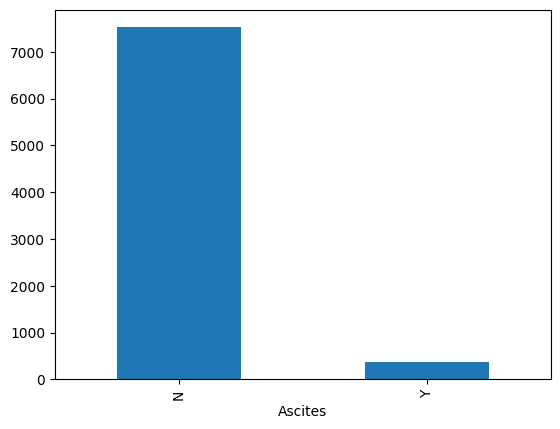

In [41]:
print(train_ds["Ascites"].value_counts())
train_ds["Ascites"].value_counts().plot(kind="bar");

### Spiders

- Lot more Yes than No.

Spiders
N    5966
Y    1939
Name: count, dtype: int64


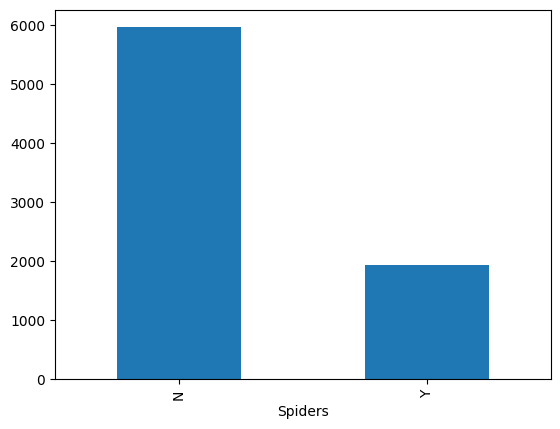

In [42]:
print(train_ds["Spiders"].value_counts())
train_ds["Spiders"].value_counts().plot(kind="bar");

### Edema

- Lots more N than S and Y

Edema
N    7161
S     399
Y     345
Name: count, dtype: int64


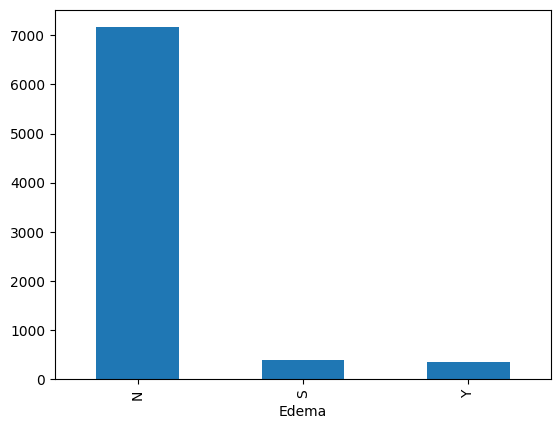

In [43]:
print(train_ds["Edema"].value_counts())
train_ds["Edema"].value_counts().plot(kind="bar");

## Numerical features

### Number of days

count    7905.000000
mean     2030.173308
std      1094.233744
min        41.000000
25%      1230.000000
50%      1831.000000
75%      2689.000000
max      4795.000000
Name: N_Days, dtype: float64


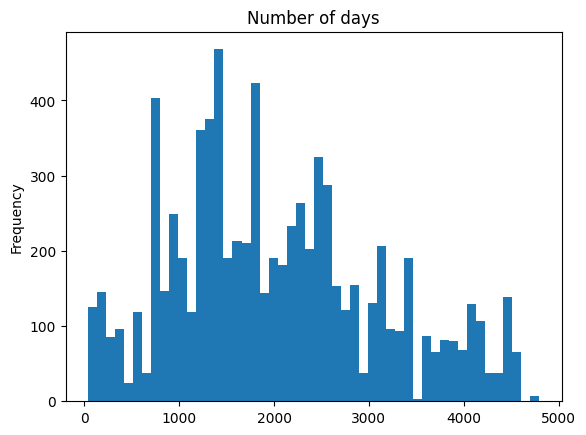

In [28]:
print(train_ds["N_Days"].describe())
train_ds["N_Days"].plot(kind="hist", bins=50, title="Number of days");

### Age

count     7905.000000
mean     18373.146490
std       3679.958739
min       9598.000000
25%      15574.000000
50%      18713.000000
75%      20684.000000
max      28650.000000
Name: Age, dtype: float64


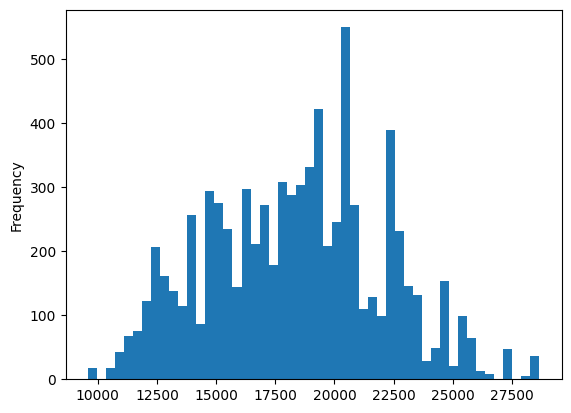

In [38]:
print(train_ds["Age"].describe())
train_ds["Age"].plot(kind="hist", bins=50);

### Alk_Phos

¿Are there all integers in Alk_Phos?

In [49]:
is_int = train_ds["Alk_Phos"] == train_ds["Alk_Phos"].astype(int)
(is_int).all()

False

No, but most of them are.

In [54]:
is_int.value_counts()

Alk_Phos
True     7494
False     411
Name: count, dtype: int64

There seem to be some clusters in the distribution of Alk_Phos.

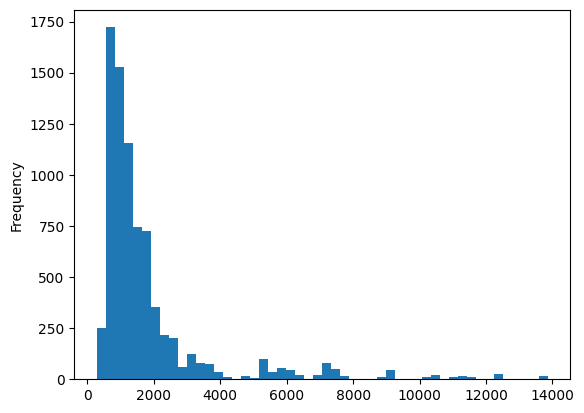

In [57]:
train_ds["Alk_Phos"].plot(kind="hist", bins=50);

### Stage

All of the Stage values are integers.

In [62]:
is_int = train_ds["Stage"] == train_ds["Stage"].astype(int)
(is_int).all()

True

The number of patients in each stage increases as the stage increases.

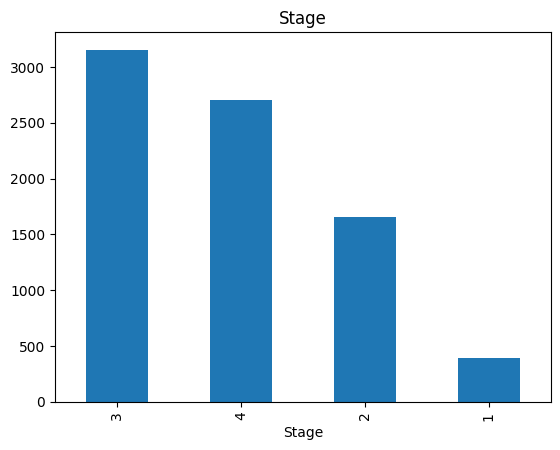

In [67]:
train_ds["Stage"].astype(int).value_counts().plot(kind="bar", title="Stage");

## Target

### ¿Is there any class imbalance?

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


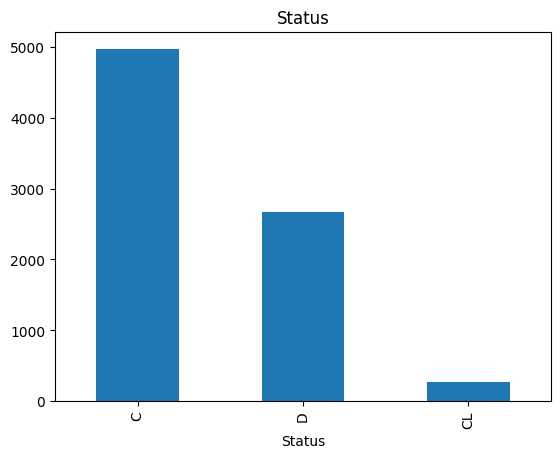

In [71]:
print(train_ds["Status"].value_counts())
train_ds["Status"].value_counts().plot(kind="bar", title="Status");